In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score
)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1599, 11)
y shape: (1599,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
svr_model = SVR(kernel='rbf')

svr_model.fit(X_train, y_train)

print("SVR Model trained successfully!")

SVR Model trained successfully!


In [6]:
y_pred_svr = svr_model.predict(X_test)
y_pred_svr[:10]

array([5.41263822, 5.07723242, 5.88358605, 5.74207652, 5.79200952,
       5.52472431, 5.09789303, 5.71466534, 5.60779105, 5.86498041])

In [7]:
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.532501080260072
R-squared: 0.18516250065554807


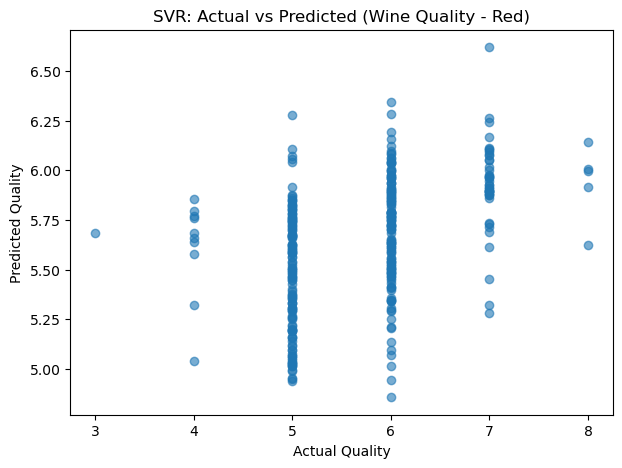

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("SVR: Actual vs Predicted (Wine Quality - Red)")
plt.show()